In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ulrikthygepedersen_electricity_demands_path = kagglehub.dataset_download('ulrikthygepedersen/electricity-demands')

print('Data source import complete.')


Data source import complete.


# Libraries, data entry and processing
The `class` column contains the target labels (e.g., "UP" and "DOWN").
These are encoded into numeric values: "UP" -> 1, "DOWN" -> 0.


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("/kaggle/input/electricity-demands/electricity.csv")

# Encode the target variable
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])  # UP -> 1, DOWN -> 0

# Convert the date column to datetime format and transform it to epoch timestamps
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].apply(lambda x: x.timestamp())

# Encode categorical data (e.g., the day column)
data['day'] = le.fit_transform(data['day'])

# Separate features (X) and target (y)
X = data[['date', 'day', 'period', 'nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']].values
y = data['class'].values

# Ensure all feature data is numeric
X = X.astype('float32')


In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1020/1020 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5955 - loss: 0.6632 - val_accuracy: 0.6717 - val_loss: 0.5981
Epoch 2/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6883 - loss: 0.5806 - val_accuracy: 0.7255 - val_loss: 0.5451
Epoch 3/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7339 - loss: 0.5340 - val_accuracy: 0.7495 - val_loss: 0.5191
Epoch 4/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7588 - loss: 0.5059 - val_accuracy: 0.7542 - val_loss: 0.5069
Epoch 5/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7557 - loss: 0.5027 - val_accuracy: 0.7652 - val_loss: 0.4980
Epoch 6/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7666 - loss: 0.4894 - val_accuracy: 0.7628 - val_loss: 0.4969
Epoch 7/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7648 - loss: 0.4949 - val_accuracy: 0.7589 - val_loss: 0.5134
Epoch 8/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7671 - loss: 0.4896 - val_accurac

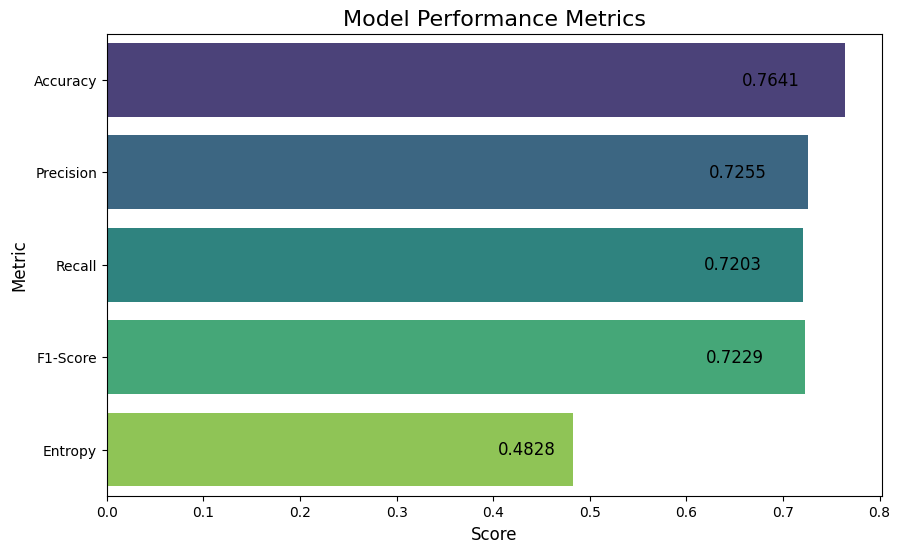

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, log_loss
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

# Create the model
model = Sequential([
    Dense(16, activation='relu', input_dim=X.shape[1]),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate performance
loss, accuracy = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)  # Binary classification with 0.5 threshold

# Metrics
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
entropy = log_loss(y_test, y_pred)

# Present results in a table
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Entropy': entropy
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=[0])

# Performance Report
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")
print("\nModel Performance Metrics:")
print(metrics_df)

# Data for performance metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Entropy'],
    'Score': [accuracy, precision, recall, f1, entropy]
}

# Create a DataFrame
df_metrics = pd.DataFrame(metrics)

# Plot the metrics
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Score', y='Metric', data=df_metrics, palette='viridis')

# Title and labels
plt.title('Model Performance Metrics', fontsize=16)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Metric', fontsize=12)

# Add metric values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():.4f}',
                (p.get_x() + p.get_width() * 0.9, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=12, color='black')

# Show the plot
plt.show()

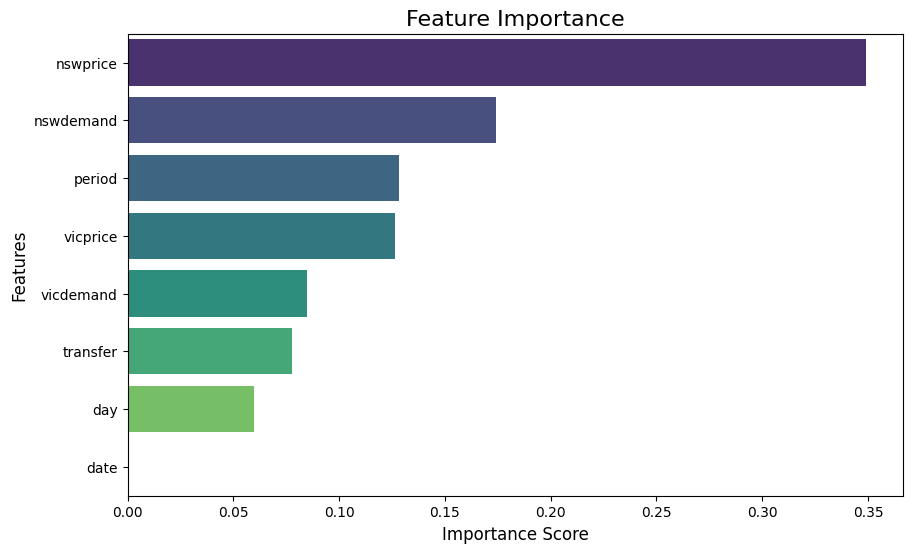

Feature Importances:
     Feature  Importance
3   nswprice    0.348950
4  nswdemand    0.174100
2     period    0.128293
5   vicprice    0.126424
6  vicdemand    0.084661
7   transfer    0.077663
1        day    0.059910
0       date    0.000000


In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/kaggle/input/electricity-demands/electricity.csv")

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])  # UP -> 1, DOWN -> 0
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].apply(lambda x: x.timestamp())


data['day'] = le.fit_transform(data['day'])


X = data[['date', 'day', 'period', 'nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']]
y = data['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Feature Importance
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature Scores
feature_importances = model.feature_importances_
feature_names = X.columns

# Scores to DF
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visuals
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

print("Feature Importances:")
print(importance_df)


# After LTSM   

In [7]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Load the dataset
data = pd.read_csv("/kaggle/input/electricity-demands/electricity.csv")

# Preprocessing
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].apply(lambda x: x.timestamp())
data['day'] = le.fit_transform(data['day'])

# Feature scaling
scaler = MinMaxScaler()
numerical_cols = ['date', 'day', 'period', 'nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Prepare data for LSTM
X = data[numerical_cols].values
y = data['class'].values
X = X.reshape(X.shape[0], 1, X.shape[1])  # Reshape for LSTM input (samples, timesteps, features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_classes)

print(f"LSTM Model Accuracy: {accuracy}")

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1020/1020 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6089 - loss: 0.6560 - val_accuracy: 0.6734 - val_loss: 0.5874
Epoch 2/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7047 - loss: 0.5679 - val_accuracy: 0.7335 - val_loss: 0.5380
Epoch 3/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7461 - loss: 0.5261 - val_accuracy: 0.7465 - val_loss: 0.5163
Epoch 4/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7545 - loss: 0.5089 - val_accuracy: 0.7548 - val_loss: 0.5090
Epoch 5/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7618 - loss: 0.5056 - val_accuracy: 0.7542 - val_loss: 0.5103
Epoch 6/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7605 - loss: 0.5027 - val_accuracy: 0.7412 - val_loss: 0.5105
Epoch 7/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7603 - loss: 0.5033 - val_accuracy: 0.7556 - val_loss: 0.5019
Epoch 8/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7617 - loss: 0.5015 - val_accurac